<h1>Laad de data in</h>

In [84]:
from datasets import load_dataset
import pandas as pd
import math
import matplotlib.pyplot as plt

languages     = ['es', 'it', 'de', 'nl', 'fr', 'en']
querry        = [
                    "Hola cómo estás",  # Spanish
                    "Ciao come stai",  # Italian
                    "Hallo wie geht es dir",  # German
                    "Hoi hoe gaat het",  # Dutch
                    "Bonjour comment ça va",  # French
                    "Hello how are you",  # English
                ]

dataset       = load_dataset("papluca/language-identification")
df_train_temp = pd.DataFrame(dataset['train'])
df_test_temp  = pd.DataFrame(dataset['test'])
df_val_temp   = pd.DataFrame(dataset['validation'])

df_train = df_train_temp[df_train_temp['labels'].isin(languages)]
df_test = df_test_temp[df_test_temp['labels'].isin(languages)]
df_val = df_val_temp[df_val_temp['labels'].isin(languages)]


df_train['text']

11       Un producto de una calidad y capacidad increíb...
13                   Una donna sta affettando della carne.
15       Alles in allem ein super schönes Teil, deshalb...
17       Einer Freundin Geschenk da sie Flugbegleiterin...
24                             Iemand houdt een egel vast.
                               ...                        
69979    Tuve que devolverlos, el auricular izquierdo s...
69987    Il governo israeliano autorizza nuovi insediam...
69989    Satisfaite de mon achat qui correspond au desc...
69992                    Muy bueno para gente con alergias
69998    Se me rompió uno al sacarlo del cargador. Cali...
Name: text, Length: 21000, dtype: object

<h1>clean de data</h>
haalt alle speciale characters weg behalve spaties

In [85]:
def drop_special_characters(df):
    special_chars = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    df_clean = df.copy()
    df_clean['text'] = df_clean['text'].apply(lambda x: ''.join([c for c in x if c not in special_chars]))
    return df_clean

df_train = drop_special_characters(df_train)
df_test = drop_special_characters(df_test)
df_val = drop_special_characters(df_val)

df_val

,labels,text
0,nl,Ik ken geen druk zei Mr Feith de ondersecretar...
1,nl,Hier is mijn advies op basis van mijn persoonl...
2,es,Por el precio este reloj es inmejorable Estilo...
3,it,Il Giappone tace in occasione della tragedia del
7,nl,Zijn dochter Nina Axelrod vertelde The Associa...
...,...,...
9978,en,The game is fine but they sent the one that wa...
9987,de,Sehr schöner preiswerter Controller Funktionie...
9990,es,El botón de home no funciona
9993,de,Die Textur ist sehr flüssig was an sich kein P...


<h1>Het maken van de N-grammen</h>

In [86]:
def create_ngram_frequency_dict(df, n):
    ngram_freq_dict = {}
    
    for index, row in df.iterrows():
        language = row['labels']
        text = row['text']
        ngram_dict = {}
        for i in range(len(text)-(n-1)):
            ngram = text[i:i+n]
            if ngram in ngram_dict:
                ngram_dict[ngram] += 1
            else:
                ngram_dict[ngram] = 1
         
        if language in ngram_freq_dict:
            ngram_freq_dict[language].update(ngram_dict)
        else:
            ngram_freq_dict[language] = ngram_dict
    
    return ngram_freq_dict

trigram_freq_dict_train = create_ngram_frequency_dict(df_train, 3)
bigram_freq_dict_train = create_ngram_frequency_dict(df_train, 2)
unigram_freq_dict_train = create_ngram_frequency_dict(df_train, 1)
trigram_freq_dict_train['nl']



{'Iem': 1,
 'ema': 1,
 'man': 1,
 'and': 1,
 'nd ': 1,
 'd h': 1,
 ' ho': 1,
 'hou': 1,
 'oud': 1,
 'udt': 1,
 'dt ': 1,
 't e': 1,
 ' ee': 1,
 'een': 1,
 'en ': 2,
 'n e': 1,
 ' eg': 1,
 'ege': 2,
 'gel': 1,
 'el ': 1,
 'l v': 1,
 ' va': 1,
 'vas': 1,
 'ast': 1,
 'Bar': 1,
 'ara': 1,
 'rac': 1,
 'ack': 1,
 'ck ': 1,
 'k O': 1,
 ' Ob': 1,
 'Oba': 1,
 'bam': 1,
 'ama': 1,
 'ma ': 1,
 'a g': 1,
 ' ge': 1,
 'gee': 1,
 'eef': 1,
 'eft': 1,
 'ft ': 1,
 't t': 1,
 ' to': 1,
 'toe': 1,
 'oe ': 1,
 'e d': 1,
 ' da': 1,
 'dat': 1,
 'at ': 1,
 't d': 1,
 ' de': 1,
 'de ': 2,
 'e V': 1,
 ' VS': 1,
 'VS ': 1,
 'S m': 1,
 ' me': 1,
 'mee': 1,
 'eer': 1,
 'er ': 1,
 'r k': 1,
 ' ke': 2,
 'ker': 3,
 'ern': 1,
 'rnw': 1,
 'nwa': 1,
 'wap': 1,
 'ape': 1,
 'pen': 1,
 'ens': 2,
 'ns ': 1,
 's h': 1,
 ' he': 1,
 'hee': 1,
 'dan': 1,
 'an ': 1,
 'n w': 1,
 ' we': 1,
 'we ': 1,
 'e n': 1,
 ' no': 1,
 'nod': 1,
 'odi': 1,
 'dig': 1,
 'ig ': 1,
 'g h': 1,
 'heb': 1,
 'ebb': 1,
 'bbe': 1,
 'ben': 1,
 'Een': 1,

<h1>Ophalen totalen nummer frequenties</h>

In [87]:
def count_ngrams(ngram_freq_dict):
    total_ngrams = 0
    ngrams_per_language = {}

    for language, ngram_freq in ngram_freq_dict.items():
        ngrams_count = 0

        for ngram, count in ngram_freq.items():
            ngrams_count += count
        
        total_ngrams += ngrams_count
        ngrams_per_language[language] = ngrams_count

    return total_ngrams, ngrams_per_language


total_trigrams, trigrams_per_language = count_ngrams(trigram_freq_dict_train) # total_trigrams for testing purposes
total_bigrams, bigrams_per_language = count_ngrams(bigram_freq_dict_train) # total_bigrams for testing purposes
total_unigrams, unigrams_per_language = count_ngrams(unigram_freq_dict_train) # total_unigrams for testing purposes

trigrams_per_language


{'es': 8086, 'it': 6887, 'de': 11611, 'nl': 8389, 'fr': 9026, 'en': 9025}

<h1>Kans per ngram berekenen</h1>
dit wordt gedaan door middel van log omdat de kansen te klein worden voor python waardoor het 0.0 wordt ipv een float

In [88]:
def calculate_ngram_chances(ngram_freq_dict, ngrams_per_language):
    ngram_chances = {}

    for language, ngram_freq in ngram_freq_dict.items():
        chances = {}
        total_ngrams = ngrams_per_language[language]

        for ngram, freq in ngram_freq.items():
            chance = freq / total_ngrams
            log_chance = math.log(chance)
            chances[ngram] = log_chance

        ngram_chances[language] = chances

    return ngram_chances

trigram_chances_train = calculate_ngram_chances(trigram_freq_dict_train, trigrams_per_language)
bigram_chances_train = calculate_ngram_chances(bigram_freq_dict_train, bigrams_per_language)
unigram_chances_train = calculate_ngram_chances(unigram_freq_dict_train, unigrams_per_language)

pd.DataFrame(trigram_chances_train).to_csv('Corpus/trigram_chances_train.csv')
pd.DataFrame(bigram_chances_train).to_csv('Corpus/bigram_chances_train.csv')
pd.DataFrame(unigram_chances_train).to_csv('Corpus/unigram_chances_train.csv')

trigram_chances_train['nl']


{'Iem': -9.034676602846295,
 'ema': -9.034676602846295,
 'man': -9.034676602846295,
 'and': -9.034676602846295,
 'nd ': -9.034676602846295,
 'd h': -9.034676602846295,
 ' ho': -9.034676602846295,
 'hou': -9.034676602846295,
 'oud': -9.034676602846295,
 'udt': -9.034676602846295,
 'dt ': -9.034676602846295,
 't e': -9.034676602846295,
 ' ee': -9.034676602846295,
 'een': -9.034676602846295,
 'en ': -8.34152942228635,
 'n e': -9.034676602846295,
 ' eg': -9.034676602846295,
 'ege': -8.34152942228635,
 'gel': -9.034676602846295,
 'el ': -9.034676602846295,
 'l v': -9.034676602846295,
 ' va': -9.034676602846295,
 'vas': -9.034676602846295,
 'ast': -9.034676602846295,
 'Bar': -9.034676602846295,
 'ara': -9.034676602846295,
 'rac': -9.034676602846295,
 'ack': -9.034676602846295,
 'ck ': -9.034676602846295,
 'k O': -9.034676602846295,
 ' Ob': -9.034676602846295,
 'Oba': -9.034676602846295,
 'bam': -9.034676602846295,
 'ama': -9.034676602846295,
 'ma ': -9.034676602846295,
 'a g': -9.03467660284

<h1>Functie voor het classificeren van de kansen per taal gegeven een imput querry en een ngram kansen lijst</h1>

$
𝑃( string | l ) = 𝑃( ngram_1 | l ) ∗ 𝑃( ngram_2 | l ) * ... ∗ 𝑃( ngram_n | l )
$


In [89]:
def classify_language_ngrams(query, trigram_chances):
    n = len(list(trigram_chances[languages[0]].keys())[0])
    #print(query)
    trigrams = [query[i:i+n] for i in range(len(query)-(n-1))]
    language_chances = {}
    
    for language, chances in trigram_chances.items():
        language_chances[language] = 0.0
        
        for trigram in trigrams:
            if trigram in chances:
                previvous_chance = language_chances[language]
                language_chances[language] += chances[trigram]
                #print("N gram has a chance of: " + str(chances[trigram]) + "; Total chance is: " + str(previvous_chance) + "; making formula: " + str(chances[trigram]) + " * " + str(previvous_chance) + " = " + str(language_chances[language]))
            else:
                language_chances[language] += math.log(0.000001)  # Smoothing 
                #print("smoothing. New chance is: " + str(language_chances[language]))
    
    return language_chances


In [90]:
def get_highest_language(results):
    highest_language = max(results, key=results.get)
    return highest_language, results

lang, chance_list = get_highest_language(classify_language_ngrams(querry[5], trigram_chances_train))
print("De taal is: " +  lang)
chance_list

De taal is: en


{'es': -148.72805789574147,
 'it': -146.80207475986924,
 'de': -156.8325381106343,
 'nl': -145.08181695293035,
 'fr': -155.4485526161135,
 'en': -135.2300123868963}

<h1>Functie voor het classificeren van de kansen per taal gegeven een imput querry, een ngram kansen lijst en een n-1gram kansen lijst (tussen grammen waarbij n-1)</h1>

$
𝑃( string | l ) = \dfrac{𝑝𝑟𝑜𝑑𝑢𝑐𝑡 𝑣𝑎𝑛 𝑎𝑙𝑙𝑒 𝑡𝑟𝑖𝑔𝑟𝑎𝑚𝑚𝑎𝑛 | l}{𝑝𝑟𝑜𝑑𝑢𝑐𝑡 𝑣𝑎𝑛 𝑎𝑙𝑙𝑒 ′𝑡𝑢𝑠𝑠𝑒𝑛′ 𝑏𝑖𝑔𝑟𝑎𝑚𝑚𝑒𝑛 | l}
$


In [91]:
def classify_language_ngrams2(query, trigram_chances, bigram_chances):
    n = len(list(trigram_chances[languages[0]].keys())[0])

    trigrams = [query[i:i+n] for i in range(len(query)-(n-1))]
    between_bigrams = [query[i:i+(n-1)] for i in range(1, len(query)-(n-2))][ : -1] #remove last element because it is not a between bigram
    #print(trigrams)
    #print(between_bigrams)
    #print(query)

    language_ngram_chances = {}
    language_between_ngram_chances = {}
    
    for language, chances in trigram_chances.items():
        language_ngram_chances[language] = 0.0
        
        for trigram in trigrams:
            if trigram in chances:
                previvous_chance = language_ngram_chances[language]
                language_ngram_chances[language] += chances[trigram]
                #print("Trigram has a chance of: " + str(chances[trigram]) + "; Total previous is: " + str(previvous_chance) + "; making formula: " + str(chances[trigram]) + " * " + str(previvous_chance) + " = " + str(language_ngram_chances[language]))
            else:
                language_ngram_chances[language] += math.log(0.000001)  # Smoothing
                #print("smoothing. New chance is: " + str(language_ngram_chances[language]))
    
    for language, chances in bigram_chances.items():
        language_between_ngram_chances[language] = 0.0
        
        for bigram in between_bigrams:
            if bigram in chances:
                previvous_chance = language_between_ngram_chances[language]
                language_between_ngram_chances[language] += chances[bigram]
                #print("Bigram has a chance of: " + str(chances[bigram]) + "; Total chance is: " + str(previvous_chance) + "; making formula: " + str(chances[bigram]) + " * " + str(previvous_chance) + " = " + str(language_between_ngram_chances[language]))
            else:
                language_between_ngram_chances[language] += math.log(0.000001) # Smoothing
                #print("smoothing. New chance is: " + str(language_between_ngram_chances[language]))

    result = {}
    #print(language_ngram_chances)
    #print(language_between_ngram_chances)
    for language, chances in trigram_chances.items():
        # Calculate ratio of probabilities
        result[language] = language_ngram_chances[language] / language_between_ngram_chances[language] # devide product trigram chances by product between bigram chances

    return result

In [92]:
lang, chance_list = get_highest_language(classify_language_ngrams2(querry[3], trigram_chances_train, bigram_chances_train))
print(chance_list)
print("De taal is: " +  lang)

{'es': 1.5953136000259893, 'it': 1.6243022048732036, 'de': 1.5912112436155719, 'nl': 1.4616725629341714, 'fr': 1.516606623334817, 'en': 1.5864345865686553}
De taal is: it


<h1>Het testen van de verschillende berekeningen met verschillende ngrams</h1>

In [93]:
def test_model(df, ngram_chances):
    correct = 0
    total = 0
    for index, row in df.iterrows():
        total += 1
        language = row['labels']
        text = row['text']
        #print(text)
        lang, chance_list = get_highest_language(classify_language_ngrams(text, ngram_chances))
        #print(chance_list)
        if lang == language:
            correct += 1
    return correct / total

def test_model_2(df, ngram_chances, ngram2_chances):
    correct = 0
    total = 0
    for index, row in df.iterrows():
        total += 1
        language = row['labels']
        text = row['text']
        #print(text)
        lang, chance_list = get_highest_language(classify_language_ngrams2(text, ngram_chances, ngram2_chances))
        #print(chance_list)
        if lang == language:
            correct += 1
    #print(correct)
    #print(total)
    return correct / total

test_model(df_val, trigram_chances_train)


0.9593333333333334

Model 1 doet het beter, vooral met trigrammen waar hij een accuraatheid haalt van 95%! Het model met de formule "𝑝𝑟𝑜𝑑𝑢𝑐𝑡 𝑣𝑎𝑛 𝑎𝑙𝑙𝑒 𝑡𝑟𝑖𝑔𝑟𝑎𝑚𝑘𝑎𝑛𝑠𝑒𝑛 | 𝑙 Gedeeld door 𝑝𝑟𝑜𝑑𝑢𝑐𝑡 𝑣𝑎𝑛 𝑎𝑙𝑙𝑒 ′𝑡𝑢𝑠𝑠𝑒𝑛′𝑏𝑖𝑔𝑟𝑎𝑚𝑘𝑎𝑛𝑠𝑒𝑛 | 𝑙" werkt veel minder goed met maar een maximale accuraatheid 15% met bigrammen en unigrammen. Het model met trigrammen en tussen bigrammen doet het erg slecht met maar 1% accuaracy. 

{0: 0.9593333333333334, 1: 0.6813333333333333, 2: 0.3496666666666667}
{0: 0.010333333333333333, 1: 0.163}


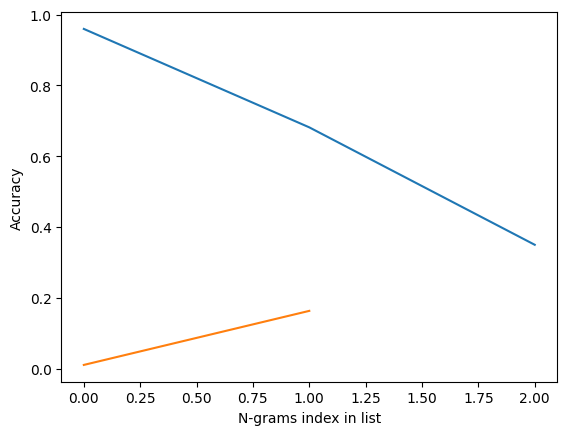

In [94]:
accuracy_result_classify_1 = {}
accuracy_result_classify_2 = {}
ngram_list = [trigram_chances_train, bigram_chances_train, unigram_chances_train]

for i in range(len(ngram_list)):
    accuracy_result_classify_1[i] = test_model(df_val, ngram_list[i])


for i in range(len(ngram_list)-1):
    accuracy_result_classify_2[i] = test_model_2(df_val, ngram_list[i], ngram_list[i+1])

plt.plot(accuracy_result_classify_1.keys(), accuracy_result_classify_1.values(), label='Trigram')
plt.plot(accuracy_result_classify_2.keys(), accuracy_result_classify_2.values(), label='Trigram + Bigram')
plt.ylabel('Accuracy')
plt.xlabel('N-grams index in list')

print(accuracy_result_classify_1)
print(accuracy_result_classify_2)
